In [1]:
from snappy import ProductIO
from snappy import jpy
from snappy import GPF

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import numpy as np

from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date
from datetime import timedelta
from datetime import datetime

import zipfile
import os 
import time
import shutil
import pickle

from sklearn import datasets
from sklearn import decomposition
from sklearn.decomposition import PCA
import scipy.linalg as la
import numpy.matlib

In [2]:
images_path = "/media/DATA-4To/Sentinel"
with open(images_path+"/ImageDataMatrix.txt", "rb") as fp:   # Unpickling
    data = pickle.load(fp)

In [3]:
len(data)

short_data = data[0:4]
len(short_data)
with open("ImageDataMatrix.txt", "wb") as fp:   #Pickling
    pickle.dump(short_data, fp)

# MAD METHOD

In [4]:
x = data[0] #image0 
y = data[5] #image9 

# change vector
def change_vector(x,y,a=np.ones(len(x)-1),b=np.ones(len(y)-1)):
    cv = []
    for i in range(len(x)-1) :
        cv.append(a[i]*x[i][:,:] - b[i]*y[i][:,:])
    return cv

cv = change_vector(x,y)
# ici cv est le vecteur contenant la différence entre les deux images sur les 16 bandes
# cv forme : cv[0-15][0-124,0-124]

date image 0 :20190321
date image 10 :20190222


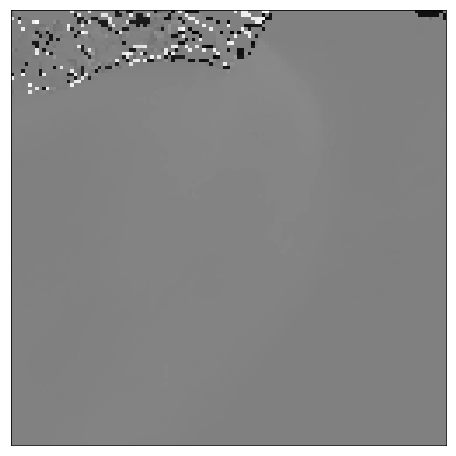

In [5]:
# simple différence entre la phot 1 et 11 de la 3eme longueur dondes
print('date image 0 :'+data[0][-1][0])
print('date image 10 :'+data[10][-1][0])
plt.figure(figsize=(8, 8))                 # adjusting the figure window size
fig = plt.imshow(cv[6], cmap = cm.gray)  # longueur d'onde : 560nm
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()

In [6]:
# variance 
# creation d'un vecteur unitaire v.T*v = 1
def unit_vect(size):
    return np.ones(size)/ np.linalg.norm(np.ones(size))
v = unit_vect(16)
print v
print v.transpose().dot(v)

[0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25]
1.0


In [7]:
def criterion_prepa (cv,v = unit_vect(16)):
    critp = []
    for i in range(len(cv)):
        critp.append(v[i]*cv[i])
    return critp

In [8]:
critp = criterion_prepa(cv)
# critp de la forme var[I][x,y] I numero de l'image, x et y coord du pixel
critp


[array([[-0.0170568 ,  0.00315409,  0.02021546, ..., -0.24966278,
         -0.24897612,  0.        ],
        [-0.06416669,  0.00235755, -0.00355693, ..., -0.24562518,
         -0.0154912 , -0.24579914],
        [ 0.23706016, -0.00313578, -0.25358136, ..., -0.00980102,
          0.00433058, -0.24503007],
        ...,
        [ 0.00309   ,  0.00258644,  0.00302133, ...,  0.00212409,
          0.00204169,  0.00133213],
        [ 0.00228431,  0.0029664 ,  0.00288858, ...,  0.0013184 ,
          0.00139622,  0.00194556],
        [ 0.00236213,  0.0034608 ,  0.00250404, ...,  0.00151067,
          0.00140538,  0.00196387]]),
 array([[-0.01718497,  0.00460067,  0.01980804, ..., -0.24985505,
         -0.24931945,  0.        ],
        [-0.06445052,  0.00179907, -0.00103   , ..., -0.24614705,
         -0.01146733, -0.24616536],
        [ 0.23656119, -0.00322276, -0.25311443, ..., -0.007622  ,
          0.0035432 , -0.24552905],
        ...,
        [ 0.00331889,  0.00285653,  0.00304422, ...,  

In [9]:
def Variance_Vect(critp):
    variance = []
    for i in range (len(critp)):
        variance.append(np.var(critp[i]))
    return variance

var_X = Variance_Vect(x[0:16])
var_Y = Variance_Vect(y[0:16])
print( var_X )
print( var_Y )

[0.024250533667236018, 0.024269757178630533, 0.02386460956654624, 0.02347862098646579, 0.023496484616003798, 0.0236463473294764, 0.024298992004875532, 0.024416776135263434, 0.024422262319467234, 0.024431679800609004, 0.02461205737880725, 0.024798493136568074, 0.02481715124615441, 0.02484941891623639, 0.024854534164380677, 0.02490261937959412]
[0.02883179798331014, 0.028890854749927364, 0.02861003086557702, 0.028242632382172735, 0.028290220568875167, 0.028493373493780564, 0.02911104977784684, 0.029142303184303577, 0.029121945563476994, 0.029122843392304858, 0.029234912536150775, 0.029217705184884764, 0.029231083106231882, 0.029212601422270647, 0.029209109058139157, 0.029218936930161418]


In [10]:
np.cov(x[0])

array([[2.33313752e-01, 1.44353656e-01, 8.70774716e-02, ...,
        7.78328332e-04, 6.77264524e-04, 8.27872959e-04],
       [1.44353656e-01, 2.21489969e-01, 1.22781790e-01, ...,
        6.00494807e-04, 5.09635241e-04, 6.44271642e-04],
       [8.70774716e-02, 1.22781790e-01, 2.26038594e-01, ...,
        3.97974223e-04, 3.51329037e-04, 5.07895964e-04],
       ...,
       [7.78328332e-04, 6.00494807e-04, 3.97974223e-04, ...,
        1.44053083e-05, 1.23854279e-05, 1.26613849e-05],
       [6.77264524e-04, 5.09635241e-04, 3.51329037e-04, ...,
        1.23854279e-05, 1.43242551e-05, 1.30241393e-05],
       [8.27872959e-04, 6.44271642e-04, 5.07895964e-04, ...,
        1.26613849e-05, 1.30241393e-05, 1.51875595e-05]])

In [11]:
N = len(x[0])
print (N)
meanx = np.mean(x[0])
print( meanx)

125
0.04629060374132939


In [12]:
S = 0
for i in range(len(x)-1):
    S += (x[i]-np.mean(x[i]))*(x[i]-np.mean(x[i]))
S = S/(len(x)-2)
print (S.shape)
print (S)

(125, 125)
[[1.80867359e-03 3.75850616e-03 6.15681703e-03 ... 2.00905815e-03
  1.93671861e-03 9.74712143e-01]
 [1.80473694e-02 3.88328051e-03 3.41868221e-03 ... 1.49433387e-03
  1.61425348e-03 1.62578572e-03]
 [9.74712143e-01 4.29004033e-03 9.92816939e-04 ... 1.56170627e-03
  1.57085396e-03 1.48882281e-03]
 ...
 [9.22630427e-04 9.04900154e-04 9.04592528e-04 ... 1.68169207e-03
  1.71726128e-03 1.81476497e-03]
 [8.89003084e-04 8.85408263e-04 8.95583865e-04 ... 1.82106332e-03
  1.72124337e-03 1.77318314e-03]
 [8.94016463e-04 8.88966938e-04 9.12364442e-04 ... 1.71340046e-03
  1.72085851e-03 1.76592289e-03]]


In [13]:
np.mean(x[0]*x[0])-np.mean(x[0])*np.mean(x[0])

0.02425053366723602

In [14]:
np.corrcoef(x[0], x[0])

array([[1.        , 0.63501003, 0.37917906, ..., 0.42455249, 0.37046922,
        0.43979424],
       [0.63501003, 1.        , 0.54873875, ..., 0.33617928, 0.2861188 ,
        0.3512756 ],
       [0.37917906, 0.54873875, 1.        , ..., 0.22054761, 0.19524806,
        0.27411921],
       ...,
       [0.42455249, 0.33617928, 0.22054761, ..., 1.        , 0.8622113 ,
        0.85600428],
       [0.37046922, 0.2861188 , 0.19524806, ..., 0.8622113 , 1.        ,
        0.88301689],
       [0.43979424, 0.3512756 , 0.27411921, ..., 0.85600428, 0.88301689,
        1.        ]])

## D'après l'étude papier

In [15]:
def crea_x(x,nrow=125,ncol=125):
    X = np.zeros((len(x)-1,nrow*ncol,))
    for i in range(len(x)-1):
        X[i] = np.reshape(x[i],(1,nrow*ncol))
    X = X-np.mean(X)
    return X

X = crea_x(x)
Y = crea_x(y)
print (X.shape)
print (Y.shape)
print (X)
print (Y)

(16, 15625)
(16, 15625)
[[-0.05651382 -0.00187348 -0.08850332 ... -0.02562299 -0.02534832
  -0.02701463]
 [-0.05501231 -0.00044522 -0.08282688 ... -0.02814992 -0.02796681
  -0.02974299]
 [-0.03660965  0.0132698  -0.05636734 ... -0.02783863 -0.02849783
  -0.02935845]
 ...
 [-0.00912468  0.04320846  0.08567191 ... -0.04422707 -0.04422707
  -0.04393409]
 [-0.01514904  0.03573752  0.08197307 ... -0.04406227 -0.04408058
  -0.04411721]
 [-0.04831045  0.004041    0.08975529 ... -0.04422707 -0.04455667
  -0.04365943]]
[[ 0.01766    -0.00854319 -0.16341853 ... -0.02571901 -0.02502319
  -0.02892345]
 [ 0.01967422 -0.01290124 -0.15611239 ... -0.02822763 -0.02744025
  -0.03042496]
 [ 0.03785715 -0.03787758 -0.12384823 ... -0.02729377 -0.02630497
  -0.02780648]
 ...
 [ 0.06506746 -0.03815225  0.02297022 ... -0.03820718 -0.03826212
  -0.0382255 ]
 [ 0.06114888 -0.04058763  0.0155176  ... -0.03811563 -0.03762123
  -0.03817056]
 [ 0.03443297 -0.07704504  0.00343227 ... -0.03807901 -0.03963545
  -0.038

In [16]:
def coeaf_x_var_1(x):
    ## calcul le vecteur a tel que var(a.T*X) = 1
    a = np.ones(x.shape[0])
    a.shape = (x.shape[0],1)
    c = np.sqrt(1/np.var(a.T.dot(x)))
    return  a*c
a = coeaf_x_var_1(X)
print(a.shape)
b = coeaf_x_var_1(Y)
print np.var(X)
print np.var(a.T.dot(X))

(16, 1)
0.024512123013248458
1.0000000000000002


In [17]:
covx = np.cov(X)
print(covx.shape)
covxi = np.linalg.inv(covx)
covy = np.cov(Y)
covyi = np.linalg.inv(covy)

corrxy = 1-np.var(a.T.dot(X)-b.T.dot(Y))/2
print(corrxy)

sigma_mats = np.cov(np.concatenate((X,Y)))
print(sigma_mats.shape)

covxx = sigma_mats[0:16,0:16]
covxxi = np.linalg.inv(covxx)
covxy = sigma_mats[0:16,16:32]
covyx = sigma_mats[16:32,0:16]
covyy = sigma_mats[16:32,16:32]
covyyi = np.linalg.inv(covyy)

p = np.sqrt((a.T.dot(covxy).dot(covyyi).dot(covyx).dot(a))/(a.T.dot(covxx).dot(a)))
print(p)
np.sqrt((b.T.dot(covyx).dot(covxxi).dot(covxy).dot(b))/(b.T.dot(covyy).dot(b)))

(16, 16)
0.6746920845175166
(32, 32)
[[0.69771927]]


array([[0.74314052]])

In [18]:
w,A = np.linalg.eig(covxy.dot(covyyi).dot(covyx))
w,B = np.linalg.eig(covyx.dot(covxxi).dot(covxy))
print(w)
print(A[:,1].shape)

[2.54953493e-01 5.88817519e-04 1.16452614e-04 2.31303275e-05
 5.36911059e-06 2.20252832e-06 3.01606733e-07 4.65319307e-08
 2.70276502e-08 1.44089779e-08 6.00344568e-09 1.93458498e-09
 1.04433301e-09 1.87703300e-10 1.11352430e-11 6.46232374e-13]
(16,)


In [19]:
A[:,15].T.dot(X)-B[:,15].T.dot(Y)

array([ 0.00070206, -0.00054163,  0.00038773, ...,  0.00058972,
        0.00065683,  0.00078588])

In [20]:
D = (A.T.dot(X)-B.T.dot(Y)) # = 2(I - R)
D.shape

(16, 15625)

In [21]:
I = np.identity(16)

In [22]:
R = I-(D/2)

ValueError: operands could not be broadcast together with shapes (16,16) (16,15625) 

## avec le code matlab

In [24]:
def  eigen(a,b):
    d1,v1 = la.eig(a,b, left=False, right=True)
    d2 = np.diag(d1)
    sort_index = np.argsort(d2) # on cherche juste les index triés
    v = v1
    for i in range(d2.shape[0]):
        v[i,:] = v1[i,sort_index[i,:]]
    dtmp = d2
    for i in range(d2.shape[0]):
        dtmp[i,:] = d2[i,sort_index[i,:]]
    d = np.diag(dtmp)
    return v,d

In [29]:
xbands = 16
ybands = 16

xtmp = x[0:xbands]  # image sans la date
ytmp = y[0:ybands]  # image sans la date

nrows = x[0].shape[0] 
ncols = x[0].shape[1]
N = nrows * ncols

X = crea_x(x)  # x.shape = N,xbands (col,row)
Y = crea_x(y)  # y.shape = N,ybands (col,row)

covxy = np.cov(np.concatenate((X,Y)))
s11 = covxy[0:xbands,0:xbands]
s22 = covxy[xbands:,xbands:]
s12 = covxy[0:xbands,xbands:]
s21 = s12.T

### ici xbands = ybands => resolution du plus petit problème :

s22i = np.linalg.inv(s22)
v1,d1 = eigen(s12.dot(s22i).dot(s21),s11)
rho = np.diag(np.sqrt(d1)).transpose() ## plus basse corrlation canonique

aux1 = v1.T.dot(s11).dot(v1)
aux2 = 1/np.sqrt(np.diag(aux1))
aux3 = np.matlib.repmat(aux2.T, xbands, 1)
v1 = v1.dot(aux3)

invstderr = np.diag(1/np.std(X,axis=1))
sgn = np.diag(np.sign(np.sum(invstderr.dot(s11).dot(v1),axis=1)))
v1 = v1.dot(sgn)

v2 = s22i.dot(s21).dot(v1)

aux1 = v2.T.dot(s22).dot(v2)
aux2 = 1/np.sqrt(np.diag(aux1))
aux3 = np.matlib.repmat(aux2.T, ybands, 1)
v2 = v2.dot(aux3)

mads = (X.T-np.matlib.repmat(np.mean(X,axis=1), N, 1)).dot(v1)-(Y.T-np.matlib.repmat(np.mean(Y,axis=1), N, 1)).dot(v2)
mads = mads.T
print (mads.shape)


(16, 15625)


In [ ]:
mads.shape

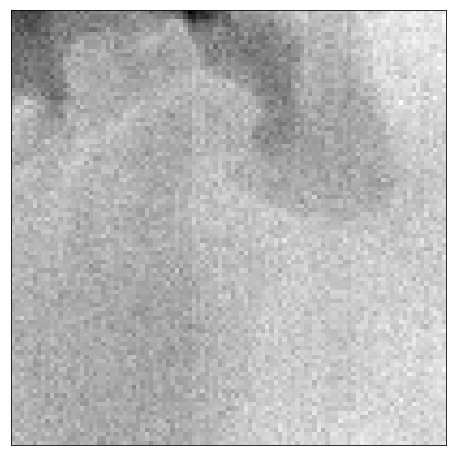

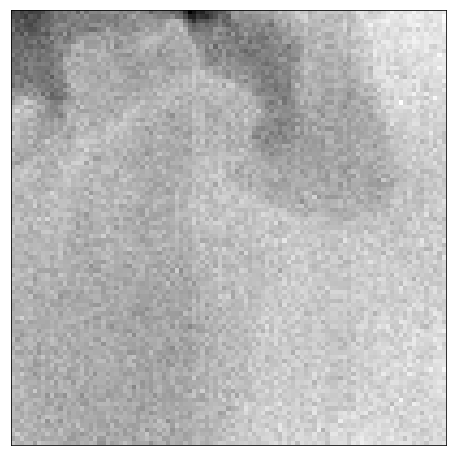

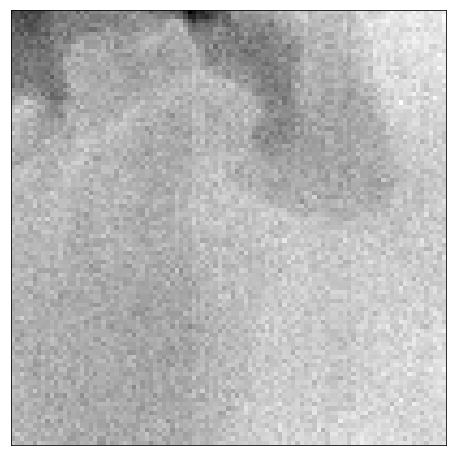

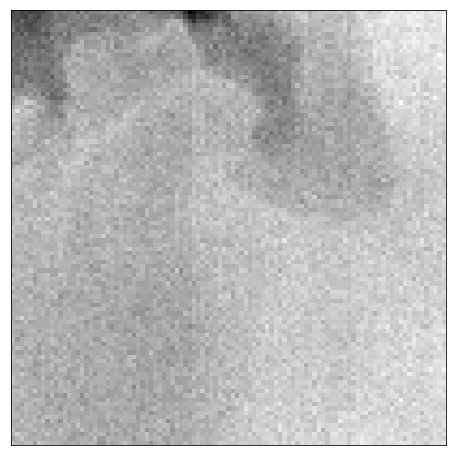

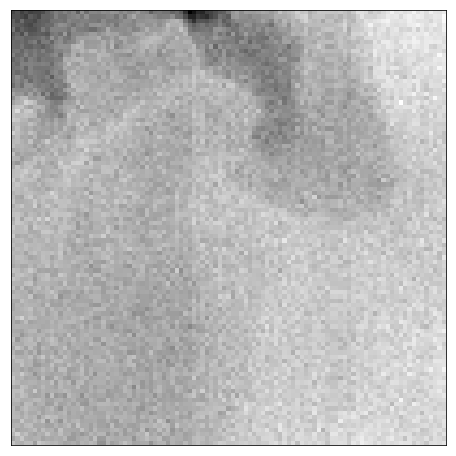

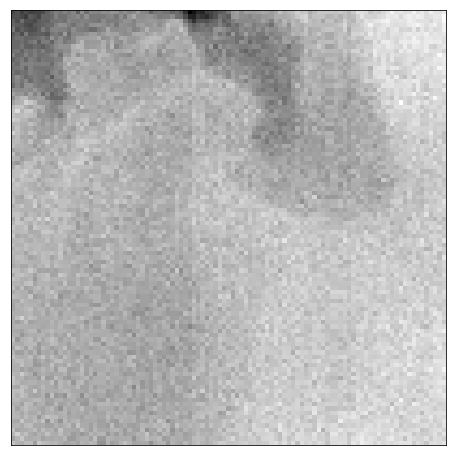

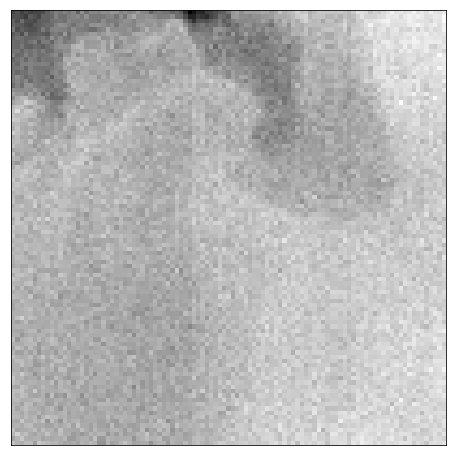

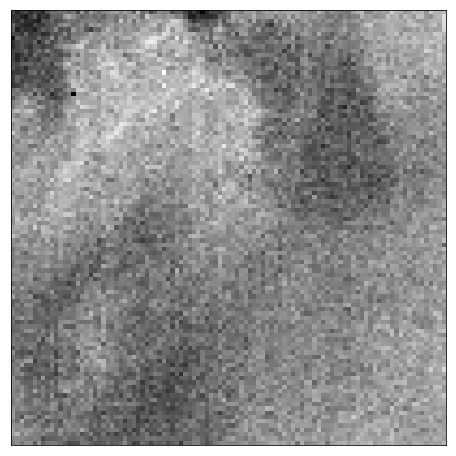

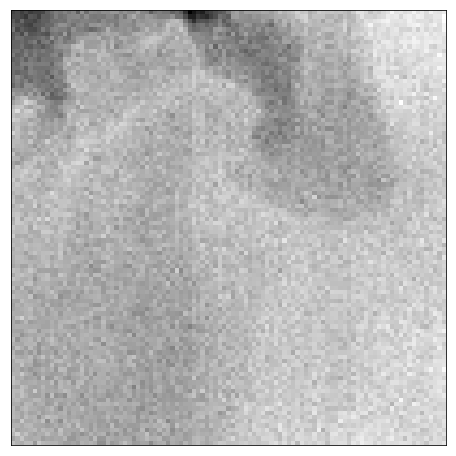

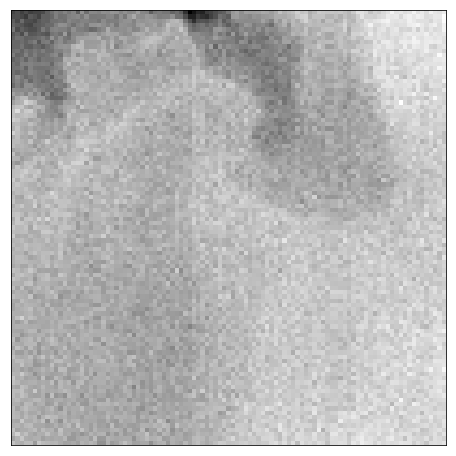

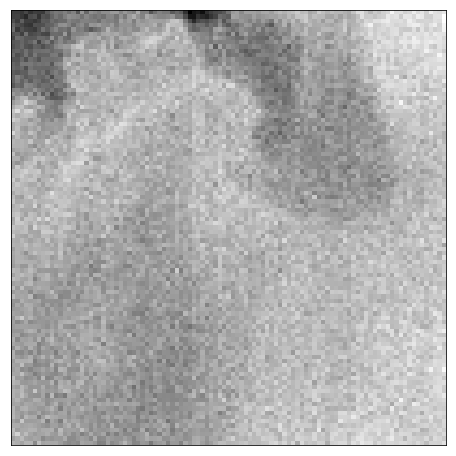

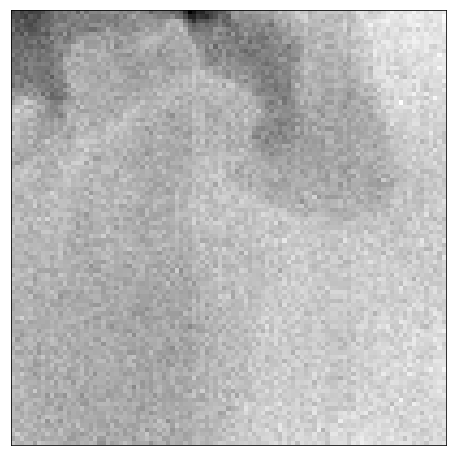

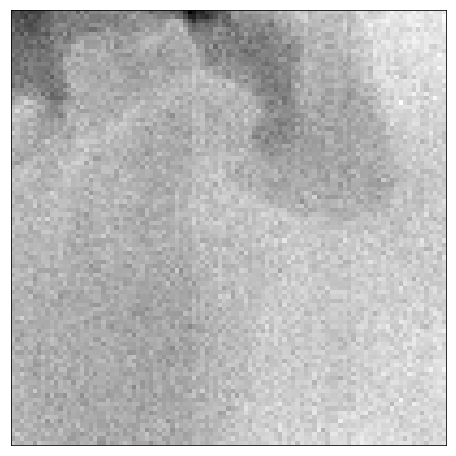

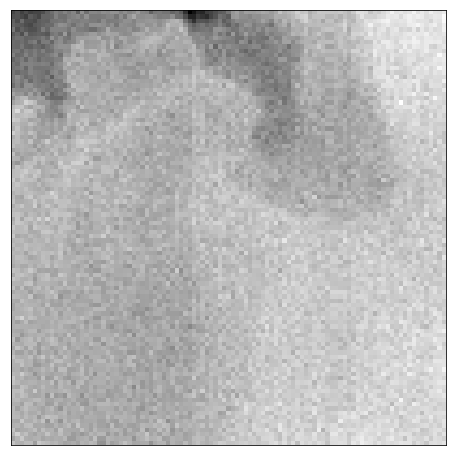

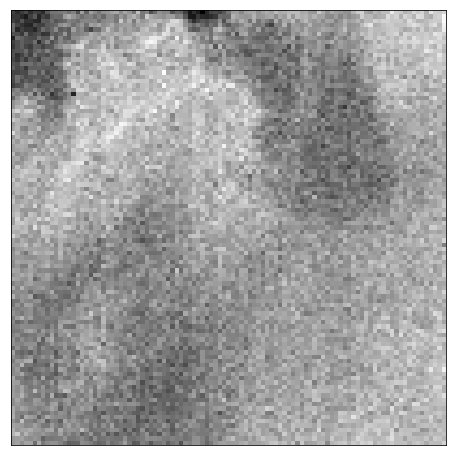

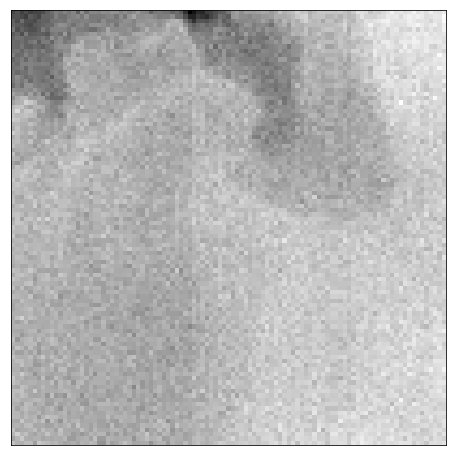

In [32]:
madsaff = np.reshape(mads.T, (ncols, nrows, xbands))
for i in range(16):
    plt.figure(figsize=(8, 8))                 # adjusting the figure window size
    fig = plt.imshow(madsaff[24:,24:,i], cmap = cm.gray)  # longueur d'onde : 560nm
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.show()

In [135]:
w,v = np.linalg.eig(s12.dot(s22i).dot(s21))
rhopi = np.sqrt(w)

sigma2mat = rhopi
for i in range(len(sigma2mat)):
    sigma2mat[i] = 2*(1-rhopi[len(rhopi)-1-i])

print('sigma.shape :',  sigma2mat.shape)
T = np.zeros(ncols*nrows)
print('T.shape :',  T.shape)

p = mads.shape[0]

for j in range(ncols*nrows):
    for i in range(p):
        T[j] += (mads[i,j]/sigma2mat[i])**2

Var = np.mean(T[4000:]**2)-np.mean(T[4000:])**2
sigma = np.sqrt(Var)
Tf = T.copy()

print(10*sigma)

for i in range(ncols*nrows):
    if T[i] > 10*sigma:
        Tf[i]=0
        
T2d = np.reshape(T.T, (ncols, nrows))
Tf2d = np.reshape(Tf.T, (ncols, nrows))

('sigma.shape :', (16,))
('T.shape :', (15625,))
8078.59311467312


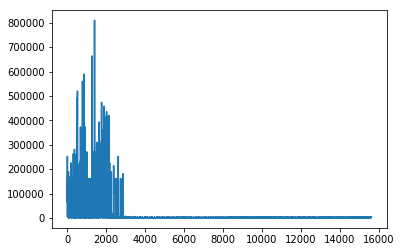

In [136]:
plt.plot(T)

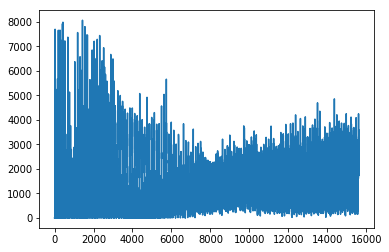

In [137]:
plt.plot(Tf)

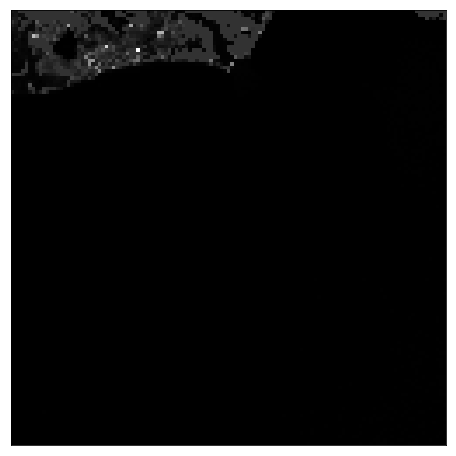

In [138]:
plt.figure(figsize=(8, 8))                 # adjusting the figure window size
fig = plt.imshow(T2d, cmap = cm.gray)  # longueur d'onde : 560nm
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()

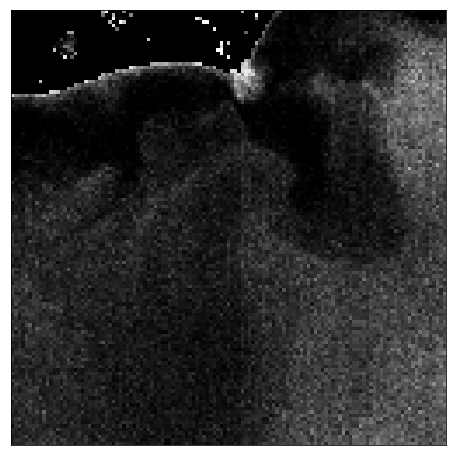

In [139]:
plt.figure(figsize=(8, 8))                 # adjusting the figure window size
fig = plt.imshow(Tf2d, cmap = cm.gray)  # longueur d'onde : 560nm
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()